In [2]:
import numpy as np
import time
import pandas as pd
from scipy.sparse import csr_matrix
from netreco import Reconstructor, ss_sim
from netreco.Reconstructor import Profile
import matplotlib.pyplot as plt

R = 100

In [3]:
%matplotlib inline
A = [
    [0.75, 0, 0, 0, 0, 1.2],
    [-.1, -.35, 0, 0, 0, 0],
    [0, 0, .85, -1, 0, 0],
    [0, -.73, 0, .95, 0, 0],
    [0, 0, .43, 0, -.6, 0],
    [0, 0, 0, 0, .2, .55]

]
A = np.array(A)
B = [
    [1.4, 0, 0],
    [0, -.25, 0],
    [0, 0, 0.75],
    [0, 0, 0],
    [0, 0, 0],
    [0, 0, 0]
]
B = np.array(B)
C = [
    [1, 0, 0, 0, 0, 0],
    [0, 1, 0, 0, 0, 0],
    [0, 0, 1, 0, 0, 0]
]
C = np.array(C)

# u = pd.read_csv('../scripts/u.csv', header=None).values
Pbool = np.identity(3)

real_params = {
    (1, 2): [0, 0.5],
    (1, 3): [.51, .75, -.11, -.6, -.816, .55],
    (2, 1): [.286, -.35],
    (2, 3): [0, 0.5],
    (3, 1): [0, 0.5],
    (3, 2): [7.684, .95, -8.588, .85]
}

In [4]:
def run(t, u, y, robust=False):
    recon = Reconstructor(debug=False, r=min(R,t), Pbool=Pbool, bounds=20, order=4)    
    rs = recon.measured(y, u, plot=False, titles=[])    
    
    flat = []
    for key, vals in rs.items():
        for k2, lst in vals.items():
            flat.append(list(lst))
            
    cols = [1, 2, 3]            
    subs = [' '.join([str(item) for item in sub]) for sub in flat]
    arr = ' ; '.join(subs)
    colstrs = ['\'{}\''.format(item) for item in cols]
    print('vulnerabilities([{}], {{{}}});'.format(arr, ', '.join(colstrs)))

In [5]:
%matplotlib inline
from multiprocessing import Pool
from functools import partial

rs = {}
step = 0.1
trng = [5, 20, 50, 100, 200, 300, 500]
# rng = [1, 2, 10, 100] 
reps = 20

u = np.random.rand(2001, 3) * 2 - 1
y = ss_sim(A, B, C, u)

def inner(t):    
    print('Running t={}'.format(t))    
    
        
    run(t, u[:t,:], y[:t, :])
    # rob = run(r, True, u, y, plot=False)
    
for t in trng:
    inner(t)
    
    

Running t=5


KeyboardInterrupt: 

(0, 2000)

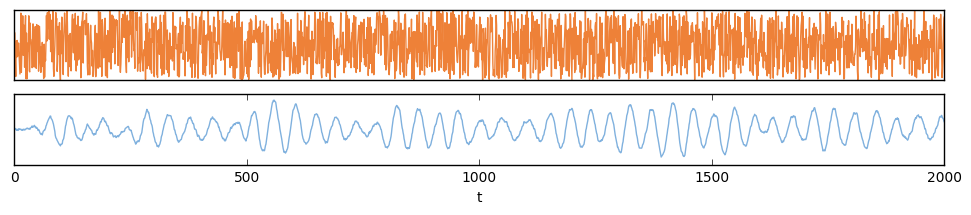

In [19]:
%matplotlib inline
plt.figure(figsize=(12,2), frameon=False)

plt.subplot(211)
u1 = list(u[:,0])
plt.plot(np.arange(len(u1)) + 1, u1, c='#ee8138')


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.subplot(212, sharex=ax)

y1 = list(y[:,2])
plt.plot(np.arange(len(y1)) + 1, y1, c='#80b1de')

ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel('t')

plt.xlim(0,2000)

(0, 500)

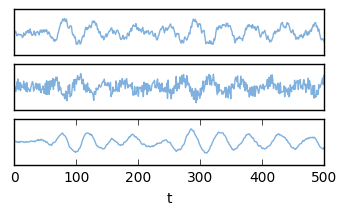

In [18]:
%matplotlib inline
plt.figure(figsize=(4,2), frameon=False)

plt.subplot(311)
u1 = list(y[:,0])
plt.plot(np.arange(len(u1)) + 1, u1, color='#80b1de')

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.subplot(312, sharex=ax)

u2 = list(y[:,1])
plt.plot(np.arange(len(u2)) + 1, u2, '#80b1de')

ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.subplot(313, sharex=ax)

u3 = list(y[:,2])
plt.plot(np.arange(len(u3)) + 1, u3, color='#ee8138')

ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel('t')


plt.xlim(0,500)

(0, 500)

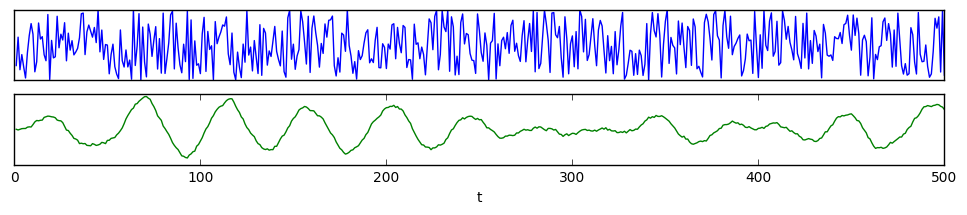

In [7]:
%matplotlib inline
plt.figure(figsize=(12,2), frameon=False)

plt.subplot(211)
u1 = list(u[:,0])
plt.plot(np.arange(len(u1)) + 1, u1)


ax = plt.gca()
ax.get_xaxis().set_visible(False)
ax.get_yaxis().set_visible(False)

plt.subplot(212, sharex=ax)

y1 = list(y[:,2])
plt.plot(np.arange(len(y1)) + 1, y1, c='g')

ax = plt.gca()
ax.get_yaxis().set_visible(False)
plt.xlabel('t')

plt.xlim(0,500)